# Cholasky decomposition

x是一个列向量, 是n个线性无关的随机变量

E(x·x^T)是x的协方差矩阵

E(x·x^T)是个单位阵

Q=L·L^T=L·E(x·x^T)·L^T=E((L·x)·(x^T · L^T))=E(y·y^T)

令y=Lx, 则y的协方差为Q

也就是 给定一个协方差矩阵,利用一组随机变量, 可以生成一组满足这个协方差矩阵的随机变量


对于拟合来说, 要模型限定, 不能太复杂, 太复杂会有结构性风险

比如9个xy散点, 我们用一次/二次拟合, 而不是9次拟合

如何避免, 把高次的模型系数放到损失函数里, 叫正则化

\lambda越大,惩罚越强,强制要求正则化

L1正则化的梯度下降, 要加个符号函数


## L1和L2正则化的区别:
- L1计算低效, L2计算高效
- L1稀疏输出
- L1特征选择


L1正则化有个稀疏性sparsity

对于模型的函数,系数为\theta, 变量为x的高次多项式

L1某些\theta会为0, 这样x, 也就是某些特征就消失了

L2只会变小,不会变0

![p1](1.png)

以二维的为例,如图, 两个轴是系数\theta_0和\theta_1

椭圆是损失函数的等高线, 越往中心J越小

L1正则化函数的等高线是围绕原点,四个点在坐标轴上的正方形

L2是圆心为原点的圆形

把两个等高线画在一起, 那么为了让最终的J+L最小, 两者的等高线必须相交

正方形和椭圆相交的时候,必然在坐标上(不在坐标上相交还能找出值更小的等高线), 这样会使某个\theta变成0

而圆形和椭圆相交的时候,切点最小(不是相切肯定能找到函数值更小的等高线), 而切点一般不在坐标轴上,这样某个特征就不会消失

因此, L1正则化有吸收性


## SVM: Support vector machine
回归问题也可以看做分类问题:

将数轴均分为n个区间, 考虑x的值的大小,其实就是找坑/多分类问题(SUR)


现在考虑 2分类问题

分隔线怎么样才最好?

不仅能分开,而且分隔线距离两类点的最近距离都尽可能的大,这样安全

也就是正中间

![p2](2.png)

引入点到直线的距离公式:

- 一维:

$$x=c$$ 

$$d = |x_{0}-c|$$

- 二维:

$$ax+by+c=0$$
$$d = \frac{|ax_{0}+by_{0}+c|}{\sqrt{a^2+b^2}}$$

- 三维:

$$ax+by+cz+d=0$$
$$d = \frac{|ax_{0}+by_{0}+cz_{0}+d|}{\sqrt{a^2+b^2+c^2}}$$

- n维:
-------------
令

$$\vec{x} = \begin{bmatrix}x\\y\\z\\ \vdots \end{bmatrix}\left.\begin{matrix} \\ \\ \\ \end{matrix}\right\}n$$

然后

$$\vec{w}=\begin{bmatrix} a \\ b \\ c \\ \vdots \end{bmatrix} \left.\begin{matrix} \\  \\  \\  \end{matrix}\right\}n$$

则任意超平面的方程: 其中b是截距(标量)

$$\vec{x}^T \cdot \vec{w} + b = 0$$

点到超平面的距离:

$$d=\frac{|\vec{x}^T \cdot \vec{w} + b|}{\sqrt{||\vec{w}||^2}}=\frac{|\vec{x}^T \cdot \vec{w} + b|}{||\vec{w}||}$$

我们只考虑两个点(最近的点)到超平面的距离

$$margin = d_{1} +d_{2}$$

显然取中间

$$d_{1}=d_{2}=d$$

则

$$margin = 2d$$

二分类, 假设标签是y, 对于某一个点i,

$$y_{i}= \left\{\begin{matrix}1& 第一类 \\ -1 &第二类 \end{matrix}\right.$$

也就是看

$$y_{i}=\vec{x_{i}}^T \cdot \vec{w} + b$$

大于0还是小于0

然后, 对于任意点(xi,yi):

$$\left\{\begin{matrix}\frac{|\vec{x_{i}}^T \cdot \vec{w} + b|}{||\vec{w}||}\geqslant d, & y_{i}=1 \\ \frac{|\vec{x_{i}}^T \cdot \vec{w} + b|}{||\vec{w}||}\geqslant d, & y_{i}=-1  \end{matrix}\right.$$

也就是

$$\left\{\begin{matrix}\frac{\vec{x_{i}}^T \cdot \vec{w} + b}{||\vec{w}||}\geqslant d, & y_{i}=1 \\ \frac{\vec{x_{i}}^T \cdot \vec{w} + b}{||\vec{w}||}\leqslant -d, & y_{i}=-1  \end{matrix}\right.$$

令

$$\vec{w_{d}}=\frac{\vec{w}}{||\vec{w}||\cdot d}$$

$$\vec{b_{d}}=\frac{b}{||\vec{w}||\cdot d}$$

有

$$\left\{\begin{matrix}\vec{x_{i}}^T \cdot \vec{w_{d}}+b_{d}\geqslant 1, &y_{i}=1 \\ \vec{x_{i}}^T \cdot \vec{w_{d}} + b_{d} \leqslant -1,&y_{i}=-1\end{matrix}\right.$$


同时有

$$\vec{x}^T \cdot \vec{w} + b = 0 \Leftrightarrow \vec{x}^T \cdot \vec{w_{d}}+b_{d}=0$$

假设

$$ \vec{x_{s}^{+}},\vec{x_{s}^{-}}$$

是那两个最近的点, 那么取等号

$$\left\{\begin{matrix}\vec{x_{s}^{+}}^T \cdot \vec{w_{d}}+b_{d}= 1\\ \vec{x_{s}^{-}}^T \cdot \vec{w_{d}} + b_{d} = -1\end{matrix}\right.$$

同时

$$\left\{\begin{matrix}\vec{x_{s}^{+}}^T \cdot \vec{w}+b= 1\\ \vec{x_{s}^{-}}^T \cdot \vec{w} + b = -1\end{matrix}\right.$$

则有

$$d=\frac{|\vec{x_{s}}^T \cdot \vec{w} + b|}{||\vec{w}||}=\frac{1}{||\vec{w}||}$$



要使d最大, 也就是要找到分隔面的法向量模||w||最小, 也就是求

在

$$ y_{i}(\vec{x_{i}}\cdot\vec{w}+b) \geqslant 1, \forall (x_{i},y_{i})$$

的约束下, 目标函数

$$\alpha = \frac{1}{2}||\vec{w}||^2 - \sum_{i=1}^{m}\alpha_{i}[y_{i}(\vec{x_{i}}\cdot\vec{w}+b)-1]$$

的最小值

这是个拉格朗日乘子法



### 很难用一条线分开的,有噪音,有错误点的怎么办?

方法有两个:
#### 1. 给间隔分类,软硬间隔
- 能用一条线严格分开的叫硬间隔

- 我们允许不能的,有噪音,有错误点的叫软间隔

用数学描述就是soft margin

对于所有的约束, 目标函数为

$$\alpha = \frac{1}{2}||\vec{w}||^2 +c\sum_{i=1}^{m} max(0,1-y_{i}(\vec{x_{i}}\cdot\vec{w}+b)) - \sum_{i=1}^{m}\alpha_{i}[y_{i}(\vec{x_{i}}\cdot\vec{w}+b)-1]$$

c是惩罚系数, 分类正确的时候,惩罚项取0, 分类错误会加一个正数惩罚项

**c越大, 意味着每个错的点都会被狠狠地惩罚, 不能容忍错误点, 所以拟合出来的模型和训练数据比较接近, 不能保证新来的数据会准确, 所以是个过拟合**


或者

$$\alpha = \frac{1}{2}||\vec{w}||^2 +c\sum_{i=1}^{m} \xi_{i}  \; where \; y_{i}(\vec{x_{i}}\cdot\vec{w}+b)\geqslant 1- \xi_{i} \;  and \; \xi_{i}\geqslant 0$$

#### 2. 硬间隔仍然可用, 引入高维

低维空间看着不可分的, 在高维一定可分

跟过拟合原理一样的

![p3](3.png)

$$z=f(x_{1}, x_{2})$$

z>z0, 第一类,

z<z0, 第二类

这叫做核技巧, f叫核函数

核函数名|表达式|参数|
-------|----------|------|
linear线性|   $$c x_{i} x_{j}$$   |$$c$$|
polynomial多项式|$$(x_{i} x_{j}+c)^d$$|$$c,\;d(d\geqslant 1)$$|
Gaussian(RBF)高斯(定向积)|$$\exp (-\frac{\|x_{j}-x_{i}\|^2}{2\sigma^2})$$|$$\sigma$$|
Laplacian拉普拉斯|$$\exp (-\frac{\|x_{j}-x_{i}\|}{2\sigma})$$|$$\sigma$$|
Sigmoid|$$\tanh (\beta x_{i} x_{j} +\theta)$$|$$\beta ,\,\theta$$|

这些核函数在```scikit-learn```中都有

### 如何选择核函数

#### 选择策略:
n代表特征个数

m代表样本个数 

- n多并且n>m: 逻辑or没有核的SVM

- n少m少, SVM的w核

- n少m多,增加特征用逻辑orSVM的w/o核

- 一般m多用SVM不太好,时间复杂度o(n^2)

- NN都可以


#### SVM优点: 
- 中小样本, (万以下)
- 容易得到非线性关系
- 可解释性强,能够直观看出物理意义

#### SVM缺点:
- 计算复杂度高
- 对于非线性问题没有通解方案

#### 顺口溜
>
> 高维用线性, 不行换特征; 低维试线性,不行用高斯

### 交叉熵 Cross Entropy

交叉熵本质上是个loss function

假设一个5分类问题

在神经网络中，最后一层输出的是样本的分类标签，用one hot encoding表示：

类别|第一类|第二类|第三类|第四类|第五类|
---|---|---|---|---|---|
one hot encoding|10000|01000|00100|00010|00001|

这各one hot encoding中，第i位代表输出a_{i}

#### 交叉熵的定义

衡量一堆数与另一堆数的差异的函数，叫做**交叉熵**

交叉熵是从KL divergence（交叉散度）过来的，其实就是交叉熵

设yi是真实的标签值， 而ai是神经网络输出的值，则交叉熵就等于

$$-\sum_{i=1}^{5} y_{i} \ln a_{i}$$

这里面很多yi都是0，只有那一项才不是0，所以上式就变成了：仅针对某个样本的真实分类值的一项：

$$-y_{k}\ln a_{k}$$

对于某一个一个样本，它的输出值**a**, 有5个分量ai，应该满足：

$$a_{i}\in [0,1] \; \; \text{and}\;\; \sum_{i=1}^{5}a_{i}=1$$

例如：

$$a=\begin{bmatrix}a_{1}\\a_{2}\\a_{3}\\a_{4}\\a_{5}\end{bmatrix}=\begin{bmatrix}0.1\\0.1\\0.1\\0.2\\0.5\end{bmatrix}$$

意思是对于某个输入，它属于第一类的概率是0.1，属于第二类的概率是0.1， …… 属于第5类的概率是0.5

预测显示该样本是第5类，但是，真实值是第四类，说明预测错误

我们需要计算交叉熵：

$$-y_{4}\ln a_{4}=-\ln 0.2$$

那么a是如何得到的呢? 考虑a的上一层z：

$$\begin{bmatrix}z_{1}\\z_{2}\\z_{3}\\z_{4}\\z_{5}\end{bmatrix}\rightarrow   SoftMax  \rightarrow  \begin{bmatrix}a_{1}\\a_{2}\\a_{3}\\a_{4}\\a_{5}\end{bmatrix}$$

其中

$$ SoftMax : \;\;a_{i}=\frac{e^{z_{i}}}{\sum_{k=1}^{5} e^{z_{k}}}$$

显然

$$\sum_{i=1}^{5}a_{i}=1$$


一般来说，在分类问题的神经网络中，SoftMax很常用


#### 交叉熵的导数

SoftMax：

$$a_{i}=\frac{e^{z_{i}}}{\sum_{k=1}^{m} e^{z_{k}}}$$

交叉熵：

$$Loss=-\sum_{i=1}^{m} y_{i} \ln a_{i}=-\ln a_{r},\;\;\text{where}\;r\;\text{is}\;\text{real}$$

Loss对z的导数，由链式法则：

$$\frac{\partial Loss}{\partial z_{j}}=\sum_{i=1}^{m}\frac{\partial Loss }{\partial a_{i}}\frac{\partial  a_{i}}{\partial z_{j}}$$

Loss只能通过ar传递到z，因为其他的ai项都是0,所以：

$$\frac{\partial Loss}{\partial z_{j}}=\frac{\partial Loss}{\partial a_{r}}\frac{\partial  a_{r}}{\partial z_{j}}$$

当j=r时：

$$\frac{\partial Loss }{\partial a_{j}}=-\frac{1}{a_{r}}$$

$$\frac{\partial  a_{r}}{\partial z_{j}}=\frac{ z_{r} e_{z_{r}}\sum_{k=1}^{m}e^{z_{k}} - z_{r}e^{z_{r}}e^{z_{r}}}{(\sum_{k=1}^{m} e^{z_{k}})^2}=z_{r}a_{r}(1-a_{r})$$

$$\frac{\partial Loss }{\partial z_{i}}=z_{r}(a_{r}-1) $$

当j不等于r时：

$$\frac{\partial Loss }{\partial a_{r}}=-\frac{1}{a_{r}}$$

$$\frac{\partial  a_{r}}{\partial z_{j}}=\frac{0\cdot \sum_{k=1}^{m}e^{z_{k}} - z_{j}e^{z_{j}}e^{z_{r}}}{(\sum_{k=1}^{m} e^{z_{k}})^2}=-z_{j}a_{j}a_{r}$$

$$\frac{\partial Loss }{\partial z_{j}}=z_{j}a_{j} $$


In [7]:
import math

def soft_max_list(input_list):
    denominator_list = [math.exp(i) for i in input_list]
    sum = 0
    for i in denominator_list:
        sum+= i
    return [math.exp(i)/sum for i in input_list]

z_list = [2,3,4]
a_list = soft_max_list(z_list)
print(a_list)

# z_big = [20000, 30000,40000]
# a_big = soft_max_list(z_big)
# print(a_big) # overflow

[0.09003057317038046, 0.24472847105479767, 0.6652409557748219]


In [17]:
import numpy as np

def soft_max_np(input_np):
    return np.exp(input_np) / np.sum(np.exp(input_np))

z_np = np.array([2,3,4],dtype='float64')
a_np = soft_max_np(z_np)
print(a_np)

# z_big = np.array([20000, 30000,40000],dtype='float64')
# a_big = soft_max_np(z_big)
# print(a_big) # overflow


[ 0.09003057  0.24472847  0.66524096]


也就是SoftMax可以使大的更大

但是如果z中每个数都很大，让计算机处理e^20000不太好

可以让分子分母都除以一个最大值


In [24]:
def real_soft_max_np(input_np):
    shift_input_np = input_np - np.max(input_np)
    print(shift_input_np)
    return soft_max_np(shift_input_np)

z_big = np.array([20000, 30000, 40000], dtype=np.float64)
a_big = real_soft_max_np(z_big)
print(a_big) # overflow


[-20000. -10000.      0.]
[ 0.  0.  1.]


### 梯度消失

激活函数主要有两类：
- 双曲正切
- sigmoid
- relu

$$sigmoid(x)=\frac{1}{1+e^{-x}}$$

$$sigmoid'(x)=sigmoid(x)\left (1-sigmoid(x) \right)$$

这样的特性，导致它在链式法则中，越往前求导，值越接近0

所以在深层网络，应该避免这种激活函数的使用

relu要好一些




## 总结监督学习

根据数据样本->特征标签,得到一种映射关系, 也就是求函数表达式的参数

这种有答案(label)的,叫监督学习






# 非监督学习

## 聚类 Clustering
监督是对每个xi给出一个答案yi

然而非监督没有yi

比如，看社交网络群体分类

某些人（小圈子）交流多，而和其他圈子的人交流少

这一个小圈子是一类，但是我们也不知道这是什么

### K-Means算法

#### 什么是K-Means

平面直角坐标系上，x，y两个轴，有很多点，我们想对这些点分成K堆

假设K=2

![p4](4.png)

0. 随机选取2个点作为**初始位置**（也叫**中心位置**），

1. 计算所有点到 **中心位置** 的距离， 

2. 根据这些距离，对所有点分类，离哪个近就是哪个类

3. 第一类中，所有点**横坐标均值**， 所有点**纵坐标均值**，作为**新的中心**，第二类同理

4. 重复1-3， 直到中心位置收敛

#### 初始点选取

**K-Means++（2007, Arthur & Vassilvitskii）**对初始选点做了优化：

总共n个点中，先选第一个点x1，选第二个点x2的时候，根据两者距离算概率

$$\frac{D^2(x_{2},x_{1})}{\sum_{i=1}^{n}D^{2}(x_{i},x_{1})}$$

选概率最大的点，也就是相对比较远的点

这样迭代次数少，更容易收敛

#### 如何选K值：
- ISODATA
    - 
- elbow method
    - ![p5](5.png)
    - k=23456789...各做一次K-Means，找到每个类中，各点距离这个类中心的距离和，画一个distance-k的折线图，找拐点
- more

#### K-Means弊端

- 初始点不好选
- k不好选
- 那种螺旋的两类点很难区分
- 数据量大的时候很难计算


### [其他的聚类算法](https://scikit-learn.org/stable/modules/clustering.html#k-means)：

- MiniBatchKMeans
- AffinityPropagation
- MeanShift
- SpectralClustering
- Ward
- AgglomerativeClustering
- DBSCAN
- Birch
- GaussianMixture

![p6](6.png)



## kNN
k - nearest neighbor k近邻

没有建模，懒惰学习lazy learning

抄作业，看着题干像，答案就抄过来

抄袭现有的数据点，k个比较像的，然后从k个里面统计答案，用答案最多的那个答案

### kNN和K-Means比较

序号|kNN|K-Means|
---|---|---|
1  |分类/回归                                           |聚类|
2  |监督学习                                            |非监督学习|
3  |基于记忆的学习（抄袭）对内存消耗大（有个数据结构叫KD树）|需要学习|
4  |k个相似的数据|分成k类


## PCA

## 降维 reduce dimension

# 机器学习的一些注意事项

不可以拿所有数据进行训练，容易太复杂、过拟合。要分成训练集、验证集

测试集是最终应用的

但是数据集是很宝贵的, 为了改善这种情况,提高利用效率,有个k-fold

## k-fold

![p7](7.png)

数据分成9块,取一块做验证,8块做训练

然后每次换一块做验证的

这样做9次, 选择最好的模型

## 过拟合/欠拟合 Overfit/Underfit

### 过拟合:

用高次的去拟合, 对当前拟合的好, 但是新数据会很差

低偏差(bias): 偏差是在训练集上准不准

高方差(variance): 方差是来新数据能不能保证效果和原来类似,表现好坏

### 欠拟合:

方差小,偏差大

![p8](8.png)

![p9](9.png)

## 决策树

### 分类树

三个维度x1,x2,x3,监督学习,预测y

首先判断x1是否>0.5, 走两个分支

然后x2也这样...

最终得到树

根据节点分裂规则(>0.5那个),分为3种分类树:
- ID3
- C4.5
- CART

节点分裂规则 基于信息增益或者信息增益比

怎么分类最好? 最大情况分开两种区分的开的东西

### 模型堆叠

把很多决策树堆叠在一起

- 它们的训练集可能会有重叠,然后把结果进行投票,并联stacking

- m1预测不好的结果再交给m2, m2不好的再交给m3,这叫串联
    - GBDT
    - HOG + Adaboost完成人脸识别

#### 信息与信息熵

信息: 太阳从东边升起不是信息, 概率为1

信息是对一个事情发生的衡量程度, 必须是正的 ,并且两个事件发生具有可加性

就像ph值一样获得灵感, 因此令P为一件事情发生的概率

$$I=-\lg P$$

这个式子是正的, 并且具有可加性(对数内乘外加)

信息熵: 信息的期望

$$Entropy: H(Y)=-\sum_{i=1}^{n}p_{i}\log p_{i}$$

条件信息熵Conditional Entropy:
$$H(Y|X)=-\sum_{i=1}^{n}p_{i}H(Y|X=x_{i}),\;\;p_{i}=P(X=x_{i})$$

信息增益: 信息F对系统带来信息G  Information Gain
$$G(Y|X)=H(Y)-H(Y|X)$$

# 手动实现NN

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets

In [2]:
np.random.seed(666)
N = 200

nn_input_dim = 2
nn_output_dim = 2
learn_rate = 0.001
reg_lambda = 0.00001


[[ 0.40329595  1.00129387]
 [ 0.73136648 -0.25127841]
 [ 0.24204387  0.15174577]
 [ 1.02514009  0.00830772]
 [ 0.21257243 -0.07557354]
 [-0.3839083   0.68224401]
 [ 0.73925776  0.58846871]
 [-0.12085532  0.03856741]
 [ 1.20517869 -0.4048194 ]
 [ 0.12441948  0.90701873]
 [ 1.91629627 -0.11123946]
 [ 1.09068847  0.12997069]
 [-0.61198983  0.79667001]
 [ 0.20674633  0.07375931]
 [ 1.68424603 -0.13842482]
 [ 2.13867789  0.3637584 ]
 [ 2.16298114 -0.15213358]
 [-0.06533626  0.50563045]
 [-1.1082889   0.08020792]
 [ 0.00789162 -0.05717489]
 [ 0.72348342  0.06003556]
 [-0.6149525   0.70082864]
 [ 0.42525251 -0.39923011]
 [ 0.7005557   0.78620984]
 [-0.87651896  0.43897381]
 [ 0.14524743  0.0808404 ]
 [-0.49580963  0.93759262]
 [-0.02684078  1.09191218]
 [-0.0698366   1.02985048]
 [-0.79190069  0.10749255]
 [ 0.94531394 -0.33035306]
 [ 0.71704562 -0.53980449]
 [ 0.5706612   0.94670424]
 [ 1.7756848   0.03953344]
 [ 0.67674564 -0.44478768]
 [ 0.08663542  0.33620856]
 [ 2.02951767  0.15651399]
 

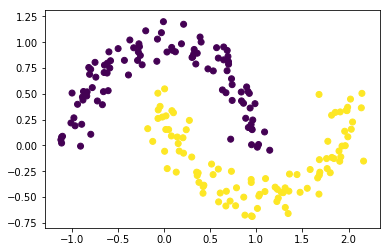

In [3]:
x, y = sklearn.datasets.make_moons(n_samples=N, noise=0.1)
print(x)
print(type(y))
print(y)
print(y.shape)
plt.scatter(x[:, 0], x[:, 1], c=y)
plt.show()

In [4]:
def active_func(input_np, type='sigmoid', paras=None):
    if type == 'sigmoid':
        return 1 / (1 + np.exp(-input_np))
    elif type == 'tanh':
        return np.tanh(input_np)
    elif type == 'relu':
        input_np[input_np <= 0] = 0
        input_np[input_np > 0] *= paras[0]
        return input_np
    else:
        return np.tanh(input_np)

In [5]:
def soft_max_np(input_np, axis=1):
    return np.exp(input_np) / np.sum(
        np.exp(input_np), axis=axis, keepdims=True)

初始层: N * input_dim    初始层可看成input_dim个列向量堆叠 每个列向量N个数

初始层·w1+b1 = 隐藏层


w1: input_dim * hidden_dim

b1: 标量

隐藏层: N * hidden_dim    可看成hidden_dim个列向量堆叠 每个列向量N个数

隐藏层·w2+b2 = 输出层

w2: hidden_dim * output_dim

b2: 标量

输出层: N * output_dim    可看成output_dim个列向量堆叠 每个列向量N个数

这里理解为对于N个样本中的每一个数,都要去看看它是哪个分类的,也就是output_dim中哪一个

所以是行求和

In [6]:
def loss(model, reg_flag=True):
    w1, b1, w2, b2 = model["w1"], model['b1'], model["w2"], model["b2"]
    z1 = x @ w1 + b1
    z1_activ = active_func(z1, type='tanh', paras=None)
    z2 = z1_activ @ w2 + b2
    probs = soft_max_np(z2, axis=1)
    cross_entropy = -np.log(probs[range(N), y])
    sum_loss = np.sum(cross_entropy)
    if reg_flag is True:
        total_loss = sum_loss + reg_lambda * 1 / 2 * (np.sum(np.square(w1)) +
                                                      np.sum(np.square(w2)))
    else:
        total_loss = sum_loss
    return total_loss / N

In [9]:
def build_model(nn_hidden_dim, max_iter=20000, print_loss=True, reg_flag=True):
    w1 = np.random.randn(nn_input_dim, nn_hidden_dim) / np.sqrt(nn_input_dim)
    b1 = np.zeros((1, nn_hidden_dim))
    w2 = np.random.randn(nn_hidden_dim, nn_output_dim) / np.sqrt(nn_hidden_dim)
    b2 = np.zeros((1, nn_output_dim))

    for i in range(max_iter):
        z1 = x @ w1 + b1
        z1_activ = active_func(z1, type='tanh', paras=None)
        z2 = z1_activ @ w2 + b2
        probs = soft_max_np(z2, axis=1)

        delta3 = probs

        # 反向传播

        delta3[range(N), y] -= 1

        dw2 = z1_activ.T @ delta3
        db2 = np.sum(delta3, axis=0, keepdims=True)
        delta2 = delta3 @ w2.T * (1 - np.power(z1_activ, 2))
        dw1 = x.T @ delta2
        db1 = np.sum(delta2, axis=0, keepdims=True)
        if reg_flag is True:
            w1 = (1 + learn_rate * reg_lambda) * w1 - learn_rate * dw1
            w2 = (1 + learn_rate * reg_lambda) * w2 - learn_rate * dw2
            b1 = (1 + learn_rate * reg_lambda) * b1 - learn_rate * db1
            b2 = (1 + learn_rate * reg_lambda) * b2 - learn_rate * db2
        else:
            w1 -= learn_rate * dw1
            w2 -= learn_rate * dw2
            b1 -= learn_rate * db1
            b2 -= learn_rate * db2

        model = {"w1": w1, "b1": b1, "w2": w2, "b2": b2}

        if print_loss and i % 1000 == 0:
            print(f"loss after iter{i}: {loss(model,reg_flag=reg_flag)}")
    return model

In [10]:
build_model(nn_hidden_dim=20, print_loss=True,reg_flag=False)


loss after iter0: 0.48718734098930655
loss after iter1000: 0.041388599302312076
loss after iter2000: 0.01636634053242555
loss after iter3000: 0.009700071514965554
loss after iter4000: 0.006695670474768006
loss after iter5000: 0.00502650992784013
loss after iter6000: 0.003981136885611426
loss after iter7000: 0.003272371929911503
loss after iter8000: 0.0027638185619487153
loss after iter9000: 0.0023830895183914514
loss after iter10000: 0.0020884948009564116
loss after iter11000: 0.001854461729294754
loss after iter12000: 0.00166449729244324
loss after iter13000: 0.0015075206694379905
loss after iter14000: 0.0013758301533812157
loss after iter15000: 0.0012639171188084809
loss after iter16000: 0.001167743828055344
loss after iter17000: 0.0010842873144707333
loss after iter18000: 0.0010112420883951472
loss after iter19000: 0.00094682096523605


{'w1': array([[-5.93428356e-01,  6.26388639e-01,  6.98205874e-01,
          3.53808804e+00, -1.17158823e+00,  5.91426401e-01,
         -5.85387405e-01,  1.41705798e+00, -1.46746126e+00,
          9.29703171e-01, -2.98359643e+00, -6.70116125e-01,
         -5.76983748e-01, -3.56206803e+00, -6.44432410e-01,
          4.34846023e+00, -5.88538169e-01, -1.33603847e+00,
         -5.96503732e-01, -6.69167162e-01],
        [ 6.76563471e-02,  4.38441824e-02, -1.74549274e-01,
         -1.65098535e+00,  2.76701066e-01, -3.46531598e-03,
         -5.54391948e-03,  2.72852920e+00,  5.72702845e-01,
         -2.66734073e-01,  9.47033632e-01, -5.46037997e-01,
          2.06042597e-01, -3.79460141e+00, -1.38543423e-02,
          1.01826613e+00, -9.46314575e-02,  4.84547885e-01,
          8.10038031e-02,  2.64405137e-02]]),
 'b1': array([[ 0.11335775, -0.31171726, -0.55835116,  1.83424303,  1.44906259,
          0.19707288,  0.04707164, -0.86159819,  1.85737181, -1.05447754,
          1.05221107, -0.05862

In [11]:
build_model(nn_hidden_dim=20, print_loss=True,reg_flag=True)

loss after iter0: 0.6628179840057525
loss after iter1000: 0.04170969546761578
loss after iter2000: 0.01784969578923774
loss after iter3000: 0.011082514324515673
loss after iter4000: 0.007819271508872776
loss after iter5000: 0.0059267094333018255
loss after iter6000: 0.0047102050572548175
loss after iter7000: 0.0038723270481311124
loss after iter8000: 0.003265442093822867
loss after iter9000: 0.0028086402156772285
loss after iter10000: 0.0024542069700017395
loss after iter11000: 0.0021723543144990995
loss after iter12000: 0.0019436157492214482
loss after iter13000: 0.001754783082447825
loss after iter14000: 0.0015966082559971603
loss after iter15000: 0.0014624406555190828
loss after iter16000: 0.0013473862827320519
loss after iter17000: 0.0012477709475409765
loss after iter18000: 0.0011607872863795795
loss after iter19000: 0.0010842565813383596


{'w1': array([[ 0.60053923, -0.75813327,  0.66598724, -0.56222669, -2.9513965 ,
         -3.8762459 ,  0.77321239,  0.60970948,  0.64381696, -0.6648363 ,
          0.603612  , -0.48593884, -0.63767027,  1.38154235,  0.65424544,
          2.95069346, -0.97156428, -1.32352419,  4.14374784,  3.26288675],
        [-0.17607958,  0.14035356, -0.1758868 , -0.1181041 , -1.58956234,
          0.14630634, -0.20186555, -0.16247628, -0.09822591, -0.10158349,
         -0.20766893,  0.38233712,  0.18126757, -0.47961688, -0.15937682,
          3.58313712,  0.26045482,  0.55408756,  1.584181  , -1.4584832 ]]),
 'b1': array([[ 0.14546828,  0.6520227 , -0.37760358, -0.00913564,  1.88839829,
          1.64283015, -0.68509476, -0.10637963, -0.2923148 , -0.15582191,
         -0.04716626, -0.1219266 ,  0.2629161 , -1.69556661, -0.32960534,
         -2.31352898,  1.07888478,  1.6060441 , -2.44102299,  1.65257859]]),
 'w2': array([[-0.99032   ,  0.91435435],
        [ 1.27291956, -1.35384924],
        [-1.309